<a href="https://colab.research.google.com/github/yeonhas/study_2023/blob/main/Ai_ch4_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab과 Kaggle
---
### 23-04-12 

In [9]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import files

In [11]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeonhas","key":"43efc35d61c68eef3ddc3b9e7ddb9eae"}'}

In [12]:
ls

kaggle.json  sample_data/


In [13]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/*

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        422           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000        929           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        429           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000       1117           False  
https://www.kaggle.com/competition

* 일반적이지 않은 쉘 명령어는 !를 붙여야함
* 여러 개의 리눅스 shell 명령어를 동시에 실행시킬 때 ! 추가해야할 경우 있음

* 600 : 읽고 쓸 수 있음

In [19]:
# Google Colab의 folder와 Google Drive의 folder 연동
#mkdir gdrive 오류나서 왼쪽 파일에서 직접 생성함.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
# Titanic Disaster 파일 다운로드
cd '/content/gdrive/My Drive/Colab Notebooks/titanic_data'

/content/gdrive/My Drive/Colab Notebooks/titanic_data


In [21]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/titanic_data


In [26]:
# 압축파일로 download되는 경우 해제하여 다시 저장
!kaggle competitions download -c titanic

# Kaggle - Titanic - Data - csv파일에서 정상적으로 파일 내용이 보이는 것을 확인할 수 있음
# (Kaggle의 Competitions - Data에 dataset download를 위한 Kaggle API (명령코드) 존재)

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
!unzip titanic.zip #zip파일 풀기

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [36]:
# 파이썬 코드로 타이타닉 데이터 실습하기
import pandas as pd
data_train = pd.read_csv('train.csv')
print(data_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

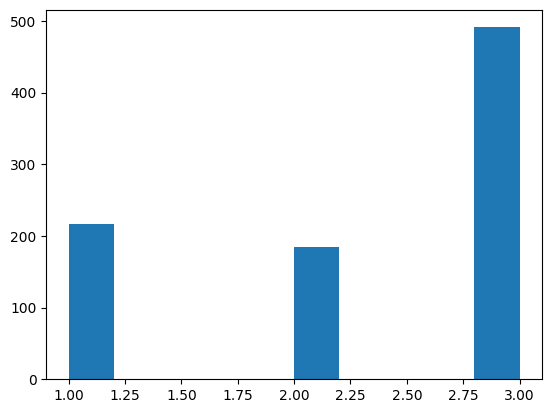

In [38]:
import matplotlib.pyplot as plt
plt.hist(data_train['Pclass'])

In [39]:
data_train.Survived #Survived 값이 1인 데이터

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

(array([136.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0., 119.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

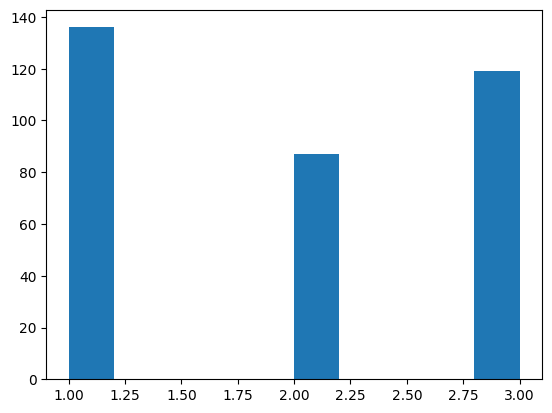

In [42]:
data_survived = data_train[data_train.Survived==1]

plt.hist(data_survived['Pclass'])

Text(0, 0.5, 'Number of People')

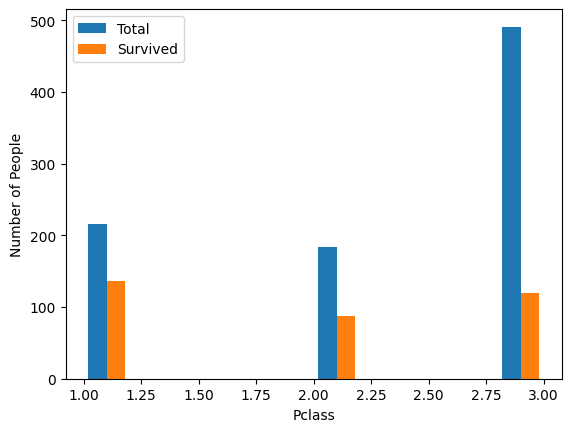

In [48]:
plt.hist([data_train['Pclass'],data_survived['Pclass']]) 


plt.legend(['Total','Survived'])  # 범례
plt.xlabel('Pclass')              # x축 제목
plt.ylabel('Number of People')    # y축 제목

# 결과 : 1등석은 전체의 절반 이상이 생존하였으며, 2등석은 전체의 약 절반, 3등석은 전체의 약 1/5가 살아남고 대부분은 생존하지못했다

In [58]:
(data_train.Survived == 1) & (data_train.Sex == 'male') # 남자 생존자

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool

In [59]:
(data_train.Survived==1)&(data_train.Sex=='female')

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

([<matplotlib.axis.XTick at 0x7f1449e53c10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

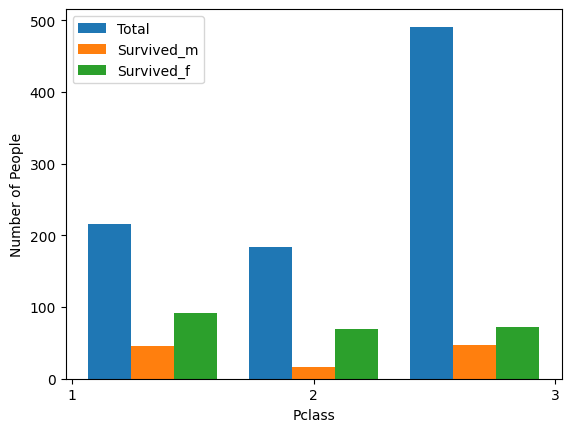

In [60]:
# 생성한 그룹의 데이터 중 성별이 남자인 데이터만 survived_m에 대입
survived_m = data_train[(data_train.Survived==1)&(data_train.Sex=='male')]

# 여자인 데이터
survived_f = data_train[(data_train.Survived==1)&(data_train.Sex=='female')]

# 히스토그램 (구간 3)
plt.hist([data_train['Pclass'], survived_m['Pclass'], survived_f['Pclass']], bins=3)

plt.legend(['Total','Survived_m','Survived_f']) # 범례
plt.xlabel('Pclass') # x축
plt.ylabel('Number of People') # y축
plt.xticks([1,2,3])

In [61]:
data_test = pd.read_csv('test.csv')

In [70]:
import numpy as np

answer = np.zeros((len(data_test),2))                                               # 결과 data를 numpy array로 초기화
answer[:, 0] = data_test['PassengerId']

answer[(data_test.Pclass == 1), 1] = 1                                              # 1등석 승객은 생존으로 설정
answer[((data_test.Pclass == 2) & (data_test.Sex == 'female')), 1] = 1              # 2등석 승객이면서 여성이면 1로 설정

In [72]:
df_answer = pd.DataFrame(answer)                                                    # 배열 answer를 데이터프레임으로 변환하고 변수에 저장
df_answer.columns = ['PassengerID','Survived']                                         # 각 열의 제목을 지정
df_answer = df_answer.astype('int32')                                               # 데이터를 정수형으로 변경

df_answer.to_csv('test_predict.csv', index = False)                                 # 결과를 csv파일로 저장, index 옵션을 지정하지 않으면 자동으로 좌측에 index가 추가됨

In [73]:
!kaggle competitions submit -c titanic -f 'test_predict.csv' -m "230412"            # -m 'message' 요구하는 경우 추가

100% 2.77k/2.77k [00:00<00:00, 4.57kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster